### iris datasets 활용 꽃잎 너비 예측 모델
- datasets: iris.csv에서 2개의 feature 사용
- 구현프레임워크: Pytorch

In [1]:
import pandas as pd
import torch                        # tensor
import torch.nn as nn               # ANN
import torch.nn.functional as F        # loss, activation, distance rtc function
import torch.optim as optimizer     # optimization

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
from torchmetrics.regression import R2Score

In [4]:
FILE_PATH = '../../EX_ML/data/iris.csv'

iris_df = pd.read_csv(FILE_PATH, usecols=[0, 1, 2, 3])
iris_df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


- learning method: supervised learning, regression
- learning algorithm: linear relation, linear model in nn.Linear

In [6]:
# model weight & bais fixed
torch.manual_seed(59)

# 저장 및 실행 위치 설정
DEVICE = 'gpu' if torch.cuda.is_available() else 'cpu'
print(f"device: {DEVICE}")

device: cpu


In [71]:
# in_features: petal.length, sepal.length, sepal.width
# out_teature: petal.width

# 그 전 층의 출력이 다음 층의 입력으로 들어옴. 이 숫자는 맞춰줘야함.
# 지금 구조는 입력 3 -> 10 -> 5 -> 1 로 출력이 1이 되는 층이 3개인 perseptron

model = nn.Sequential(nn.Linear(3, 10),     # input layer
                      nn.ReLU(),            # activation function
                      nn.Linear(10, 5),     # hidden layer, hidden 표시를 안해도 되는 걸까?
                      nn.ReLU(),            # activation function
                      nn.Linear(5, 1))      # output layer

In [72]:
# model structure
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


In [73]:
from torchinfo import summary   # 모델 정보 관련 모듈 - 추가 설치

In [74]:
print(model)
summary(model, input_size=(1,3))

Sequential(
  (0): Linear(in_features=3, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 1]                    --
├─Linear: 1-1                            [1, 10]                   40
├─ReLU: 1-2                              [1, 10]                   --
├─Linear: 1-3                            [1, 5]                    55
├─ReLU: 1-4                              [1, 5]                    --
├─Linear: 1-5                            [1, 1]                    6
Total params: 101
Trainable params: 101
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [75]:
# weight & bais

for name, param in model.named_parameters():
    print(f"[{name}] {param}\n")

[0.weight] Parameter containing:
tensor([[ 0.5478, -0.0950,  0.1925],
        [-0.5479,  0.4130, -0.5407],
        [ 0.3541,  0.0599, -0.5730],
        [ 0.4725, -0.3021,  0.5375],
        [-0.2065,  0.2128,  0.0112],
        [ 0.2909,  0.4402,  0.0040],
        [ 0.1143, -0.1311,  0.2665],
        [-0.2098, -0.4833,  0.5172],
        [-0.3172,  0.1701, -0.0766],
        [-0.3681,  0.1295,  0.1573]], requires_grad=True)

[0.bias] Parameter containing:
tensor([-0.0671,  0.0313,  0.2059, -0.1744,  0.4276, -0.3323,  0.4715,  0.3644,
        -0.4438, -0.4062], requires_grad=True)

[2.weight] Parameter containing:
tensor([[ 0.1740, -0.0152,  0.2544,  0.1500,  0.2160,  0.2538,  0.1773, -0.2674,
          0.0734,  0.1358],
        [ 0.2150, -0.1305,  0.1738, -0.3007, -0.3029,  0.1523,  0.0144,  0.0073,
         -0.3003, -0.2794],
        [ 0.1138, -0.1915, -0.2946,  0.3129, -0.2886,  0.0406,  0.2004,  0.2214,
          0.2060, -0.2977],
        [-0.0593,  0.1292,  0.3118,  0.2501, -0.2255, -0

- optimization instance
    - weight & bais optimaization

In [76]:
adam_op = optimizer.Adam(model.parameters(), lr=0.1)

- model learning
    - developer to do..?

- datasets to tensor: 데이터 준비 시 시행하거나 또는 학습 전에 진행

In [77]:
# feature & label
feature_df = iris_df[iris_df.columns[:-1]]
label_df = iris_df[['petal.width']]

print(feature_df.shape, label_df.shape)

(150, 3) (150, 1)


In [78]:
# random_state: 39
# train & test
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=39)

# train & val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=39)

print(f"train: {X_train.shape}, test: {X_test.shape}, val: {X_val.shape}")
print(f"train: {y_train.shape}, test: {y_test.shape}, val: {y_val.shape}")

train: (96, 3), test: (30, 3), val: (24, 3)
train: (96, 1), test: (30, 1), val: (24, 1)


- model learning
    - epoch: 100, 학습 횟수지정
    - 베치크기 와 개수 결정

In [79]:
import math

In [80]:
EPOCH = 1000                                    # leanring count
BATCH_SIZE = 12                                 # in 1 epoch, learning size
BATCH_CNT = X_train.shape[0] // BATCH_SIZE      # in 1 epoch, learning count and update count

print(f"Epoch: {EPOCH}, Batch Size: {BATCH_SIZE}, Batch Count: {BATCH_CNT}")

Epoch: 1000, Batch Size: 12, Batch Count: 8


In [81]:
# test & validation function
# must not weight & bais update

def testing(test_ts, label_ts, kind='Val'):
    
    with torch.no_grad():
        
        pre_y = model(test_ts)
        
        # 오차계산: loss function
        loss = F.mse_loss(pre_y, label_ts)
        # loss_list.append(loss.item())
        r2 = R2Score()(pre_y, label_ts)
            
    return loss, r2

In [82]:
# model learning function
def training(train_X_df, train_y_df, val_X_df, val_y_df, kind='Val'):
    loss_history = [[], []]
    r2_history = [[], []]
    
    for epoch in range(EPOCH+1):
        bs_loss, bs_r2 = 0, 0
        for i in range(BATCH_CNT):
            start = i * BATCH_SIZE
            end = start + BATCH_SIZE
            # print(start, end)
            
            # batch size 만큼 데이터를 추출해서 teanser화
            bs_X_train = torch.FloatTensor(train_X_df[start:end].values).to(DEVICE)
            bs_y_train = torch.FloatTensor(train_y_df[start:end].values).to(DEVICE)
            # print(bs_X_train.shape, bs_X_train.device, bs_X_train.dtype)
            
            # 학습진행: forward
            pre_y = model(bs_X_train)
            
            # 오차계산: loss function
            train_loss = F.mse_loss(pre_y, bs_y_train)
            bs_loss += train_loss.item()
            bs_r2 += R2Score()(pre_y, bs_y_train).item()
            
            
            # 최적화: optimization
            adam_op.zero_grad()
            train_loss.backward()
            adam_op.step()
            
        # validation
        bs_X_val = torch.FloatTensor(val_X_df.values).to(DEVICE)
        bs_y_val = torch.FloatTensor(val_y_df.values).to(DEVICE)
        val_loss, val_r2 = testing(bs_X_val, bs_y_val)
                
        loss_history[0].append(bs_loss/BATCH_CNT)
        r2_history[0].append(bs_r2/BATCH_CNT)
        
        loss_history[1].append(val_loss.item())
        r2_history[1].append(val_r2.item())
        
        # 학습결과
        if epoch%10 == 0:
            print(f"epoch: {epoch:5} train loss: {bs_loss:10.8f}")
            print(f"epoch: {epoch:5} {kind} loss: {val_loss.item():10.8f}")
            print(f"epoch: {epoch:5} {kind} R2 Score: {val_r2.item():10.8f}")
            
    return loss_history, r2_history
    # return 0

In [83]:
loss, r2 = training(X_train, y_train, X_val, y_val)

epoch:     0 train loss: 8.72864334
epoch:     0 Val loss: 0.38899755
epoch:     0 Val R2 Score: 0.28293073


epoch:    10 train loss: 0.47806793
epoch:    10 Val loss: 0.08565270
epoch:    10 Val R2 Score: 0.84210974
epoch:    20 train loss: 0.51173370
epoch:    20 Val loss: 0.04498241
epoch:    20 Val R2 Score: 0.91708046
epoch:    30 train loss: 0.41206592
epoch:    30 Val loss: 0.04375869
epoch:    30 Val R2 Score: 0.91933620
epoch:    40 train loss: 0.31468309
epoch:    40 Val loss: 0.03773163
epoch:    40 Val R2 Score: 0.93044639
epoch:    50 train loss: 0.27596770
epoch:    50 Val loss: 0.03405785
epoch:    50 Val R2 Score: 0.93721855
epoch:    60 train loss: 0.26336411
epoch:    60 Val loss: 0.03324164
epoch:    60 Val R2 Score: 0.93872309
epoch:    70 train loss: 0.26114062
epoch:    70 Val loss: 0.03295371
epoch:    70 Val R2 Score: 0.93925387
epoch:    80 train loss: 0.26161381
epoch:    80 Val loss: 0.03283706
epoch:    80 Val R2 Score: 0.93946892
epoch:    90 train loss: 0.26287649
epoch:    90 Val loss: 0.03325616
epoch:    90 Val R2 Score: 0.93869632
epoch:   100 train loss: 0.2

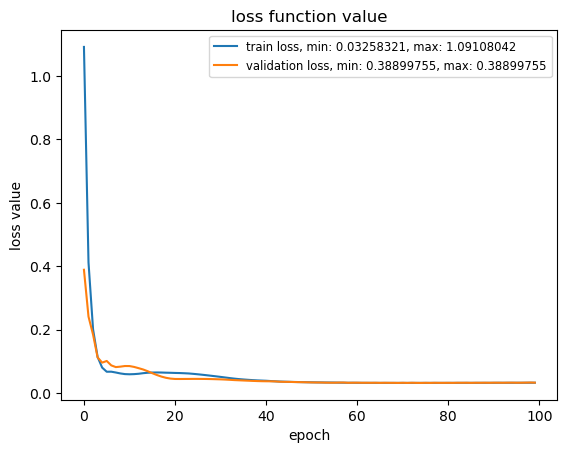

In [99]:
plt.plot(loss[0][:100], label=f'train loss, min: {min(loss[0]):.8f}, max: {max(loss[0]):.8f}')
plt.plot(loss[1][:100], label=f'validation loss, min: {max(loss[1]):.8f}, max: {max(loss[1]):.8f}')

plt.title('loss function value')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.legend(fontsize='small')
plt.show()

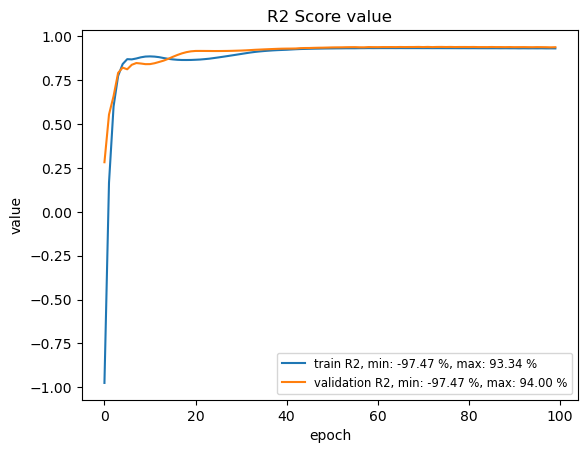

In [104]:
plt.plot(r2[0][:100], label=f'train R2, min: {min(r2[0])*100:.2f} %, max: {max(r2[0])*100:.2f} %')
plt.plot(r2[1][:100], label=f'validation R2, min: {min(r2[0])*100:.2f} %, max: {max(r2[1])*100:.2f} %')

plt.title('R2 Score value')
plt.xlabel('epoch')
plt.ylabel('value')
plt.legend(fontsize='small')
plt.show()

In [103]:
bs_X_test = torch.FloatTensor(X_test.values).to(DEVICE)
bs_y_test = torch.FloatTensor(y_test.values).to(DEVICE)

test_loss, test_r2 = testing(bs_X_test, bs_y_test)

print(f"test loss    : {test_loss.item():10.8f}")
print(f"test R2 Score: {test_r2.item()*100:.2f} %")

test loss    : 0.05035932
test R2 Score: 91.33 %
